<a href="https://colab.research.google.com/github/aymenahmed733/lab-g/blob/main/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1 basim 2200
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler #دالة تقوم بتحويل كل البيانات الى نفس المقياس بين ال 0و1
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [ ]:
#2
data = pd.read_csv('E:\my_project\Python\Ai\dataset\HousingData.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
#3 show data
#3.1
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#3.2
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
#4 المعالجة المسبقة للبيانات
# معرفة الاعمدة التي تحوي حقول فارغة
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
#تعبئة الحقول الفارغة
columns = ['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']#قائمة بال الاعمدة التي تحوي حقول فارغة
for c in columns:#حلقة تمر على عناصر القائمة
    data[c].fillna(data[c].mean(),inplace=True)#تعبئة الحقل الفارغ بمتوسط قيمة العمود

In [ ]:
#اضهار ارتياط العمود المستهدف (TAX)مع الاعمدة الاخرى
data.corr()['TAX'].sort_values(ascending=False)

TAX        1.000000
RAD        0.910228
INDUS      0.716062
NOX        0.668023
CRIM       0.566528
LSTAT      0.524545
AGE        0.500589
PTRATIO    0.460853
CHAS      -0.031483
RM        -0.292048
ZN        -0.308334
B         -0.441808
MEDV      -0.468536
DIS       -0.534432
Name: TAX, dtype: float64

In [ ]:
#5 تقسيم البيانات واعداد مجموعات الاختبار والتدريب
#فصل السمات عن الفئات
x = data.drop("TAX",axis='columns')
y = data["TAX"]

#تحويل البيانات الى مقياس موحد بين ال 0 و 1
scaler = StandardScaler()
x=scaler.fit_transform(x)
#تقسيم مجموعات الاختبار والتدريب
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# بناء نموذج تنبوء باستخدام غابة عشوائية (Random Forest) وتحسين أدائه باستخدام تقنية البحث الشبكي (GridSearchCV).
rfc = RandomForestRegressor()
params = {'n_estimators':[100,200,300,400,500,600,700,800,900,1000]}

grid_model = GridSearchCV(rfc, params,verbose=2)
grid_model.fit(xtrain,ytrain)

prediction = grid_model.predict(xtest)

print('Random Forest accuracy is --> ',r2_score(ytest,prediction)*100)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. n_estimators=100, total=   0.6s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ................................. n_estimators=100, total=   0.5s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.5s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.5s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   0.5s
[CV] n_estimators=200 ................................................
[CV] ................................. n_estimators=200, total=   1.0s
[CV] n_estimators=200 ................................................
[CV] ................................. n_estimators=200, total=   0.8s
[CV] n_estimators=200 ................................................
[CV] ................................. n_estimators=200, total=   0.8s
[CV] n_estimators=200 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished


Random Forest accuracy is -->  97.94120758862857


In [ ]:
grid_model.best_params_

{'n_estimators': 600}

In [ ]:
res = pd.DataFrame()
res['Y_Test'] = ytest
res['PREDICTION'] = prediction
res.head()

,Y_Test,PREDICTION
173,296,369.286667
274,254,256.026667
491,711,688.396667
72,305,303.321667
452,666,666.000000


E:\program file\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'predicted values')

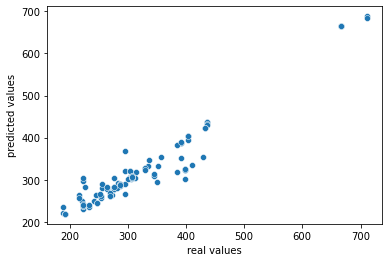

In [ ]:
sns.scatterplot(ytest,prediction)
plt.xlabel('real values')
plt.ylabel('predicted values')